# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import statsmodels.stats.api as mod
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


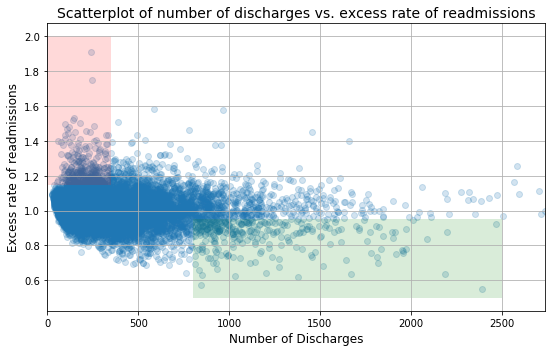

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

**A. Do you agree with the above analysis and recommendations? Why or why not?**

Below recommendations were made above:
    
Overall, rate of readmissions is trending down with increasing number of discharges
With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

**A** 

The conclusions above is based on two factors - readmission rate and number of discharges which may or may not be 
correlated. 
There can be other factors that may be the cause of higher readmissions. We will need to deep dive into the data before 
the above conclusion is made.

The scatterplot is not enough to make such a conclusion

Lets start with analyzing the dataset first.

In [10]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [11]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [14]:
# the dataset has 12 columns and 16860 rows.
# For some of the rows, Footnote, Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
#  and Number of Readmissions are empty for some rows
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number_of_Discharges           5282
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

**B**
1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  αα  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
     a.What are the advantages and disadvantages of using this plot to convey information?
     b.Construct another plot that conveys the same information in a more direct manner.



In [15]:
#Hypothesis Test
#Null Hypothesis - There is no difference in readmission ratios between the small and large hospitals.
#Alternate Hypothesis - There is significant difference in readmission ratios between the small and large hospitals.

#calculating the readmission rates for small and large hospitals

#Small hospitals < 100

#Large hospitals > 1000

In [15]:
clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                         'Number of Readmissions'], inplace=True)



In [16]:


hp_df_small  = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100 ]
hp_df_large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
    
mean_rate_small  = hp_df_small ['Excess Readmission Ratio'].mean()
mean_rate_large = hp_df_large['Excess Readmission Ratio'].mean()

n_small  = len(hp_df_small )
n_large = len(hp_df_large)

num_small  = len(hp_df_small [hp_df_small ['Excess Readmission Ratio'] > 1])
num_large = len(hp_df_large[hp_df_large['Excess Readmission Ratio'] > 1])

excess_rate_lt_100  = num_small  * 100.0 / n_small
excess_rate_gt_1000 = num_large * 100.0 / n_large

print('Small hospitals, mean rate is and mean excess re-admit rate' )
print (mean_rate_small, excess_rate_lt_100)

print('Large hospitals, mean rate is %.3f and mean excess re-admit rate' )
print(mean_rate_large, excess_rate_gt_1000)


Small hospitals, mean rate is and mean excess re-admit rate
1.0226183501683506 63.215488215488215
Large hospitals, mean rate is %.3f and mean excess re-admit rate
0.9783354211663071 44.49244060475162


The values stated in the orignal report were 
For smaller hospital the mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
This matches with our result

for larger hospitals, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
This matches with our result
 
    
**This means that the conclusion made from the report is right.**

In [18]:
hp_df_sm= hp_df_small ['Excess Readmission Ratio']
hp_df_lr=hp_df_large['Excess Readmission Ratio']

In [20]:
res = sms.CompareMeans(sms.DescrStatsW(hp_df_small ['Excess Readmission Ratio']), 
                       sms.DescrStatsW(hp_df_large['Excess Readmission Ratio']))
res

z_stat, p_value = res.ztest_ind()
print("Z statistic is",z_stat)
print("p_value is",p_value)

Z statistic is 10.060620398500793
p_value is 8.247694433231281e-24


Since p value < alpha , we can reject the null hypothesis and conclude that 
there is significant difference in readmission ratios between the small and large hospitals.



if we assume alpha as 0.01
in that case

p-value < alpha, we can reject the null hypothesis and conclude that there is significant difference in readmission ratios 
between the small and large hospitals.



**Practical vs Statistical Significance**
Statistically speaking, we can conclude that there is significant difference in readmission ratios between the small and large hospitals..

However, there are some factors that we must consider :
(1) it is not very clear why small hospitals were defined with less than 100 discharges and 
why large hospitals are defined as ones with more than 1000 discharges. 
(2) We have not used the data of the hospitals which have discharges between 100 and 1000
(3) There can be other factors such facilities, resources, availability of good staff that can also cause 
higher readmission rates in smaller hospitals


**Scatter Plot provided above does not reflect the true picture as** 
there are too many points plotted in the plot which makes it difficult to identify a trend


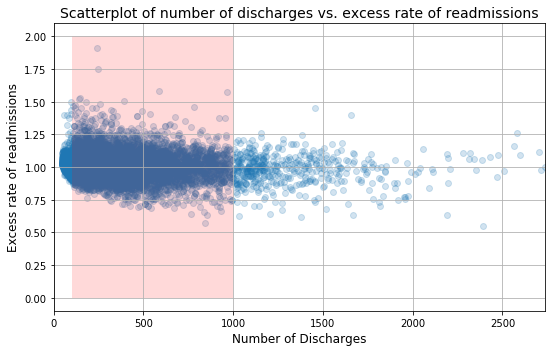

In [25]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([100,1000], 0, 2, facecolor='red', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

From the refreshed graph we can conclude that there the number of readmissions do not change signficantly if we increase the number of discharges.

For more than 3000 hospitals, some of the important vairables like unumber of readmissions and excess readmission ratio
was missing.  The results may have looked different if we had non-null values for these hospitals.


In [27]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64